# Mudcard


## Supervised ML algorithms, part 1

By the end of this lecture, you will be able to
- describe the main components of any ML algorithm
- describe how linear regression works
- describe how logistic regression works


## <font color='LIGHTGRAY'>Supervised ML algorithms, part 1 </font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **describe the main components of any ML algorithm**
- <font color='LIGHTGRAY'>describe how linear regression works</font>
- <font color='LIGHTGRAY'>describe how logistic regression works</font>


## The supervised ML pipeline
The goal: Use the training data (X and y) to develop a <font color='red'>model</font> which can <font color='red'>accurately</font> predict the target variable (y_new') for previously unseen data (X_new).

**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors
   - do as much EDA as you can!
    
**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
**4. Choose an evaluation metric**: depends on the priorities of the stakeholders
   - often requires quite a bit of thinking and ethical considerations
     
<span style="background-color: #FFFF00">**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models</span>
   - start with simple models like linear or logistic regression 
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

## Supervised ML algorithms: three parts
- 1) **a mathematical model ($f$)** is used to convert the feature values into a prediction

$f(X_i) = y_i'$, where $i$ is the $i$th data point in our sample. $X_i$ is a vector and $y_i'$ is a number.
    - $f$ is your supervised ML algorithm
    - it usually has a number of intrinsic parameters 
- 2) the optimization algorithm minimizes a metric called **the cost function**
    - the cost function is used to determine the best intrinsic parameters of one model based on the training data
    - it is not the same as the evaluation metric
        - you use the evlaution metric to compare various models
        - the model uses the cost function to find the best values of its intrinsic parameters
        - keep in mind though that the same metric can be used as the cost function and the evaluation metric (e.g., MSE in regression) but that's not necessarily the case (e.g., the cost function is MSE but you use R2 as an evaluation metric).
- 3) **an optimization algorithm** is used to determine the intrinsic parameter values given the training set 
    - there are various algorithms
    - e.g., analytical solutions, brute force, gradient descent, backpropagation


## <font color='LIGHTGRAY'>Supervised ML algorithms, part 1 </font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>describe the main components of any ML algorithm</font>
- **describe how linear regression works**
- <font color='LIGHTGRAY'>describe how logistic regression works</font>


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression # import the model
LinReg = LinearRegression() # initialize a simple linear regression model 
LinReg.fit(X_train,y_train) # we will learn now what happens when you issue this line in regression

- This is the mathematical model:
    ### <center>$f(X_i) = y_i' = w_0 + X_{i1} w_1 + X_{i2} w_2 +$ ... $= w_0 + \sum_{j=1}^{m} w_j  X_{ij} $</center>
 <center>where $y_i'$ is the prediction of the linear regression model and $w$ are parameters.</center>
- The cost function is MSE
- We will find the best parameter values by brute force first, then simple gradient descent.

## Let's generate some data

In [1]:
# load packages and generate data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from sklearn.datasets import make_regression
matplotlib.rcParams.update({'font.size': 11})

# fix the seed so code is reproducable
np.random.seed(1)

# generate n_samples points
n_samples = 30

# generate data
X, y, coef = make_regression(n_samples = n_samples, n_features = 1, coef = True, noise= 10, bias=0)
print(coef) # the coefficients of the underlying linear model, the bias is 0.
print(np.dot(X,coef)[:,0]) # noise is added to the label
print(y)
df = pd.DataFrame()
df['x1'] = X[:,0]
df['y'] = y
print(df.head())
df.to_csv('data/regression_example.csv',index=False)

28.777533858634875
[  9.18115839 -30.87739085  24.90429735  -4.96205858  32.94232532
  14.46054785 -66.23260778 -19.67600162 -11.0521372  -25.26260034
 -59.28576902 -31.67310564 -31.65215819  32.62708851  50.21137962
  -3.53647763 -26.92913658  46.7446537   42.07586066  25.94555749
 -21.90565736  15.2623224  -15.19948048  -7.70915828  16.77198455
   1.21480753  25.92441258  -7.17626442 -17.60484091  -9.27837201]
[  3.08130585 -48.2639338   25.93592732   1.87178372  45.4428258
   6.88380644 -72.44927625 -16.20740827 -12.15967691 -25.0337406
 -66.76530644 -35.83422144 -27.17695128  53.04737598  52.96856006
  10.13384942 -20.19197583  36.16208808  58.99412194  38.42855536
 -32.81240623   6.77988325 -15.82439642 -20.62478531  18.61129032
   9.78715027  31.80735422  -4.11214063 -11.04200012 -15.08634424]
         x1          y
0  0.319039   3.081306
1 -1.072969 -48.263934
2  0.865408  25.935927
3 -0.172428   1.871784
4  1.144724  45.442826


In [2]:
def predict(X,w):
    if len(np.shape(w)) != 2:
        w = np.array(w)[np.newaxis,:] # just a numpy trick to make the dot product work
    y_pred = w[0,0] + X.dot(w[0,1:]) # intercept + w_i*x_i 
    return y_pred

def cost_function(X,y_true,w):
    """
    Take in a numpy array X,y_true, w and generate the cost function
    of using w as parameter in a linear regression model
    """
    m = len(y)
    w = np.array(w)[np.newaxis,:] # just a numpy trick to make the dot product work in predict
    y_pred = predict(X,w)
    cost = (1/m) * np.sum(np.square(y_true-y_pred)) # this is MSE
    return cost

#### <center>$y_i' = w_0 + x_{i1} w_1$</center>
- $w_0$ is the intercept
- $w_1$ is the slope

#### We are looking for the best fit line!

For a given $w$ vector, the cost function returns the MSE.

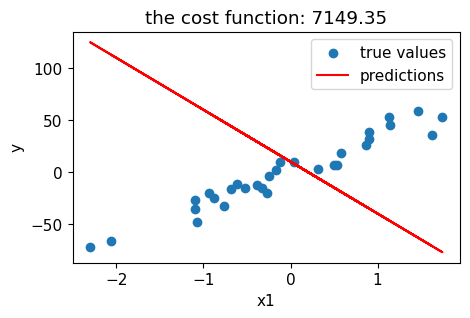

In [3]:
w = [10,-50]#[0,40] # intercept is w[0], the slope is w[1]

plt.figure(figsize=(5,3))
plt.scatter(df['x1'],df['y'],label='true values')
plt.plot(df['x1'],predict(df['x1'].values[:,np.newaxis],w),label='predictions',color='r')
plt.title('the cost function: '+str(np.around(cost_function(df['x1'].values[:,np.newaxis],df['y'],w),2)))
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.savefig('figures/line_fit.png',dpi=300)
plt.show()


## What we want:
- Find the w vector that minimizes the cost function!
   - that's our best fit model
   
## How we do it:
- brute force
   - create a grid of w[0] and w[1] values
   - loop through all w vectors on the grid
   - find the w vector that comes with the smallest cost

In [4]:
n_vals = 101

w0 = np.linspace(-100,100,n_vals) # the intercept values to explore
w1 = np.linspace(-100,100,n_vals) # the slope values to explore

cost = np.zeros([len(w0),len(w1)]) # the cost function's value for each w

# loop through all intercept-slope combinations and calculate the cost function
for i in range(n_vals):
    for j in range(n_vals):
        w = [w0[i],w1[j]]
        cost[i,j] = cost_function(df['x1'].values[:,np.newaxis],df['y'],w)
        
print('min(cost):',np.min(cost))
min_coords = np.unravel_index(cost.argmin(),np.shape(cost))
print('best intercept:',w0[min_coords[0]])
print('best slope:',w1[min_coords[1]])


min(cost): 71.43643291686587
best intercept: 2.0
best slope: 32.0


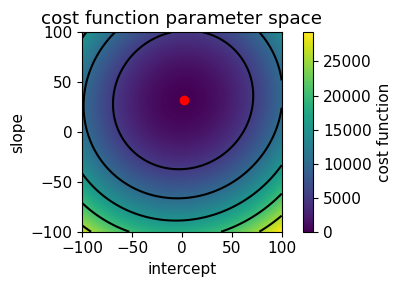

In [5]:
plt.figure(figsize=(5,3))
ax = plt.gca()
extent = (np.min(w0),np.max(w0),np.min(w1),np.max(w1))
fig = ax.imshow(cost.T,origin='lower',extent=extent,vmin=0)
plt.colorbar(fig,label='cost function')
ax.contour(w0,w1,cost.T,levels=5,colors='black')
plt.scatter(w0[min_coords[0]],w1[min_coords[1]],c='r')
ax.xaxis.set_ticks_position("bottom")
plt.xlabel('intercept')
plt.ylabel('slope')
plt.title('cost function parameter space')
plt.tight_layout()
plt.savefig('figures/cost_function.png',dpi=300)
plt.show()

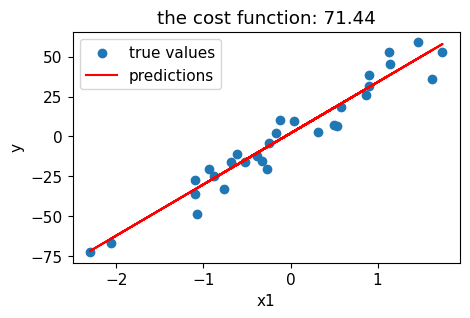

In [6]:
w = [2,32] # intercept is w[0], the slope is w[1]

plt.figure(figsize=(5,3))
plt.scatter(df['x1'],df['y'],label='true values')
plt.plot(df['x1'],predict(df['x1'].values[:,np.newaxis],w),label='predictions',color='r')
plt.title('the cost function: '+str(np.around(cost_function(df['x1'].values[:,np.newaxis],df['y'],w),2)))
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.savefig('figures/line_fit.png',dpi=300)
plt.show()


## Quiz 1

### The brute force approach works but...

- the number of w vectors to loop through explodes with the number of features we have
   - with n features, we would need to loop through ~ $100^n$ w vectors.
   - no guarantee that the best w vector is within our grid.
- We need to use a smarter numerical method to find the best w!
   - gradient descent to the rescue!

### How do we find the best $w$ values?
- start with arbitrary initial $w$ values and the cost function L
- repeat until convergence:
<center>$w_j := w_j - l \frac{\partial L(w)}{\partial w_j} $, </center>
<center>where $\frac{\partial L(w)}{\partial w_j}$ is the gradient of the cost function at the current $w$ location and $l$ is the learning rate.</center>

   - the gradient tells us which way the cost function is the steepest
   - the learning rate tells us how big of a step we take in that direction

In [7]:
def gradient_descent(X,y_true,w,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X
    y    = Vector of Y
    w = Vector of ws
    learning_rate 
    iterations = no of iterations
    
    Returns the final w vector and array of cost history over no of iterations
    '''
    m = len(y_true)
    w = np.array(w)[np.newaxis,:]

    cost_history = np.zeros(iterations)
    w_history = np.zeros([iterations+1,np.shape(w)[1]])
    w_history[0] = w
    for it in range(iterations):
        
        y_pred = predict(X,w)
        delta_w = np.zeros(np.shape(w)) # the step we take 
        # the derivative of the cost function with respect to the intercept
        delta_w[0,0] = (1/m) * sum(y_pred - y_true)
        # the derivative of the cost function with respect to the slopes
        delta_w[0,1:] = (1/m)*( X.T.dot((y_pred - y_true)))
        w = w - learning_rate * delta_w # update w so we move down the gradient
        w_history[it+1] = w[0]
        cost_history[it] = cost_function(X,y_true,w[0])
        
    return w[0], cost_history, w_history

In [8]:
w,cost_history,w_hist = gradient_descent(df['x1'].values[:,np.newaxis],df['y'],[-100,-100],0.01,1500)
print(w)
print(w_hist)

[ 1.14458074 32.24849231]
[[-100.         -100.        ]
 [ -99.06782181  -98.70917181]
 [ -98.14419169  -97.43097591]
 ...
 [   1.14457933   32.24849104]
 [   1.14458004   32.24849168]
 [   1.14458074   32.24849231]]


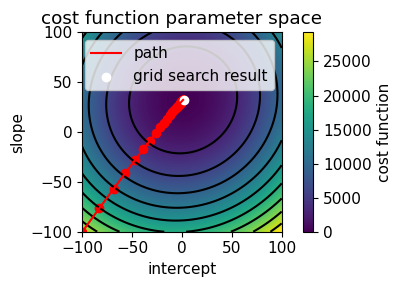

In [9]:
plt.figure(figsize=(5,3))
ax = plt.gca()
extent = (np.min(w0),np.max(w0),np.min(w1),np.max(w1))
fig = ax.imshow(cost.T,origin='lower',extent=extent,vmin=0)
plt.colorbar(fig,label='cost function')
ax.contour(w0,w1,cost.T,levels=10,colors='black')
plt.plot(w_hist[::20,0],w_hist[::20,1],color='r',label='path')
plt.scatter(w_hist[::20,0],w_hist[::20,1],c='r')
plt.scatter(w0[min_coords[0]],w1[min_coords[1]],c='w',label='grid search result')
ax.xaxis.set_ticks_position("bottom")
plt.legend()
plt.xlabel('intercept')
plt.ylabel('slope')
plt.title('cost function parameter space')
plt.tight_layout()
plt.savefig('figures/cost_function_with_path.png',dpi=300)
plt.show()

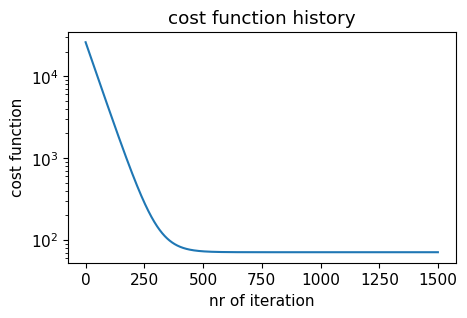

In [10]:
plt.figure(figsize=(5,3))
plt.plot(cost_history)
plt.semilogy()
plt.ylabel('cost function')
plt.xlabel('nr of iteration')
plt.title('cost function history')
plt.savefig('figures/cost_hist.png',dpi=300)
plt.show()

### DO NOT USE MY `gradient_descent` FUNCTION!
- it is for illustration purposes only
- it is much slower than the sklearn implemementation!
- in fact, sklearn uses the Least Squares method to solve linear regression problems (that's a different type of optimizer)

## Quiz 2

## <font color='LIGHTGRAY'>Supervised ML algorithms, part 1 </font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>describe the main components of any ML algorithm</font>
- <font color='LIGHTGRAY'>describe how linear regression works</font>
- **describe how logistic regression works**


## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression() # initialize a simple logistic regression model
LogReg.fit(X_train,y_train) # we will learn what happens when you issue this line in classification

- name is misleading, logistic regression is for classification problems!
- the model:

<center>$y_i' = \frac{1}{1+e^{-z}}$, where</center>

<center>$z = w_0 + \sum_{j=1}^{m} w_j  x_{ij}$</center>

$f(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function.

- it is linear regression model but a sigmoid function is applied to its output

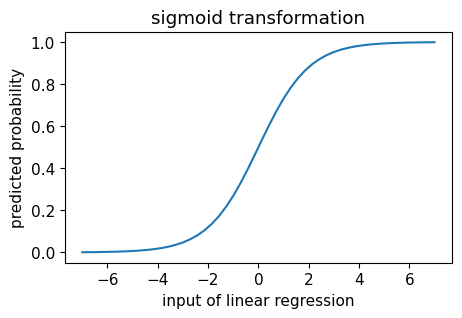

In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-7,7,50)

plt.figure(figsize=(5,3))
plt.plot(z,sigmoid(z))
plt.xlabel('input of linear regression')
plt.ylabel('predicted probability')
plt.title('sigmoid transformation')
plt.savefig('figures/sigmoid_trans.png',dpi=300)
plt.show()

## The cost function
- the logloss metric is used as a cost function in logistic regression

<center>$L(w) = - \frac{1}{m}\sum_{i=1}^{m} [y_i\ln(y_i') + (1-y_i)\ln(1-y_i')]$ </center>
<center>$L(w) =  - \frac{1}{m}\sum_{i=1}^{m} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}})]$</center>

## Gradient descent
- the basic algorithm works but the `gradient_descent` function needs to be updated because the cost function changed!
- repeat until convergence:
<center>$w_j := w_j - l \frac{\partial L(w)}{\partial w_j} $, </center>
<center>where $\frac{\partial L(w)}{\partial w_j}$ is the gradient of the cost function at the current $w$ location and $l$ is the learning rate.</center>

## Mud card